In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file
mpesa_data = pd.read_csv('mpesa_statements.csv')

# Display the first few rows of the dataset
print(mpesa_data.head())

# Display basic information about the dataset
print(mpesa_data.info())

   customer_id transaction_id  received_amount  balance_then  sent_amount  \
0          388     MC70545UF6              0.0         113.0         10.0   
1          388     MC69450ZFF              0.0         123.0         20.0   
2          388     MC573VIJND              0.0         143.0         20.0   
3          388     MC4734FVSL              0.0         163.0         10.0   
4          388     MC432USAVR              0.0         173.0         10.0   

   transaction_type transaction_datetime  statement_upload_id  
0  Airtime Purchase  2018-03-07 15:29:00              85803.0  
1  Airtime Purchase  2018-03-06 07:08:00              85803.0  
2  Airtime Purchase  2018-03-05 17:43:00              85803.0  
3  Airtime Purchase  2018-03-04 15:24:00              85803.0  
4  Airtime Purchase  2018-03-04 08:07:00              85803.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105854 entries, 0 to 105853
Data columns (total 8 columns):
 #   Column                Non-Null Count  

In [2]:
# Check for missing values in the dataset
missing_values = mpesa_data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
customer_id                0
transaction_id             1
received_amount            0
balance_then               0
sent_amount                0
transaction_type           0
transaction_datetime       0
statement_upload_id     3773
dtype: int64


In [3]:

# Describe only specific numerical columns
print(mpesa_data[['received_amount', 'balance_then', 'sent_amount']].describe())


       received_amount   balance_then    sent_amount
count    105854.000000  105854.000000  105854.000000
mean        345.736242    3124.035878     345.485379
std        2322.458112    7762.098118    1975.259687
min           0.000000   -6802.110000       0.000000
25%           0.000000      41.000000       3.000000
50%           0.000000     424.310000      26.000000
75%           0.000000    2528.000000     100.000000
max       70000.000000   99001.510000   70000.000000


Investigate further why there are negative balances

In [4]:
# Filter transactions with negative balances
negative_balance_transactions = mpesa_data[mpesa_data['balance_then'] < 0]

# Display the filtered transactions
print("Transactions with Negative Balances:")
print(negative_balance_transactions)

Transactions with Negative Balances:
       customer_id transaction_id  received_amount  balance_then  sent_amount  \
2238         52361     NAA73H1B19              0.0      -3397.15       3400.0   
2258         52361     NA841TSCHC              0.0      -3383.75       3400.0   
3589         74628     NAJ9ABM3XP              0.0        -40.00         40.0   
3594         74628     NAJ1AAUHOF              0.0        -90.00         90.0   
3599         74628     NAH290Q4IU              0.0        -62.00         62.0   
...            ...            ...              ...           ...          ...   
78358       139376     NCV1VQS1GT              0.0       -479.26        480.0   
78370       139376     NCT9TYNYUJ              0.0       -476.38        480.0   
78379       139376     NCR6SM8NFA              0.0       -465.61        500.0   
78384       139376     NCR2SATN48              0.0       -450.00        450.0   
82323        64030     NBO43GCXRS              0.0       -829.79       4

- It shows that 3499 customers has Fuliza transactions - since you can transaction without 0.00 balance in actual M-Pesa account

### Explore numerical values 

In [5]:
# Define bins for each column
received_bins = [0, 1, 100, 500, 1000, 5000, 10000, 70000]
sent_bins = [0, 1, 100, 500, 1000, 5000, 10000, 70000]
balance_bins = [-7000, 0, 100, 500, 1000, 5000, 10000, 100000]

# Create frequency tables
received_freq = pd.cut(mpesa_data['received_amount'], bins=received_bins).value_counts().sort_index()
sent_freq = pd.cut(mpesa_data['sent_amount'], bins=sent_bins).value_counts().sort_index()
balance_freq = pd.cut(mpesa_data['balance_then'], bins=balance_bins).value_counts().sort_index()

# Display frequency tables
print(" Frequency Table: Received Amount")
print(received_freq)

print("\n Frequency Table: Sent Amount")
print(sent_freq)

print("\n Frequency Table: Balance Then")
print(balance_freq)



 Frequency Table: Received Amount
received_amount
(0, 1]              49
(1, 100]          8684
(100, 500]        5800
(500, 1000]       3246
(1000, 5000]      3940
(5000, 10000]      865
(10000, 70000]     677
Name: count, dtype: int64

 Frequency Table: Sent Amount
sent_amount
(0, 1]              828
(1, 100]          59977
(100, 500]        10563
(500, 1000]        5733
(1000, 5000]       4263
(5000, 10000]       676
(10000, 70000]      553
Name: count, dtype: int64

 Frequency Table: Balance Then
balance_then
(-7000, 0]          9981
(0, 100]           25144
(100, 500]         19934
(500, 1000]        10260
(1000, 5000]       23186
(5000, 10000]       8258
(10000, 100000]     9091
Name: count, dtype: int64


### Conclunsion:

#### **Received Amount**:
- The majority of transactions approximately 37.3% fall  small inflows. 
- There is significant portion ~24.9% of transactions are mid-sized inflows. 
- There is likely to be bulk inflows accounting for only ~3.7%.

#### **Sent Amount**:
- Most transactions ~72.6% are small outflows, likely daily expenses.
- There are mid-sized outflows  ~12.8% are also common.
- Often there is high-value outflows, making up only ~1.5% combined.

#### **Balance Then**:
- Low balances are common, with 25144 transactions ~23.7%.
- Mid-range balances dominate of 100-500, accounting for ~50.7% of transactions.
- ~8.6% of transactions range between 10000-100000 indicating less high balances.
- Negative balances ~9.4% suggest overdrafts cause by users who use Fuliza.

### Explore transaction types

Percentage of Top 10 Most Common Transaction Types:
Pay Bill Charge: 32.41%
Airtime Purchase: 19.04%
Customer Transfer of Funds Charge: 14.07%
Withdrawal Charge: 11.61%
OverDraft of Credit Party: 7.28%
M-Shwari Withdraw: 3.42%
OD Loan Repayment to  - M-PESA Overdraw: 3.16%
Pay Bill Online to  - Safaricom Offers Acc. Tunukiwa: 3.02%
Pay Bill to  - SportPesa Acc. : 3.02%
Pay Bill to  - XBET. Acc.: 2.97%


C:\Users\ELIZABETH\AppData\Local\Temp\ipykernel_38540\1006217853.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=transaction_type_counts.values[:10], y=transaction_type_counts.index[:10], palette='viridis')


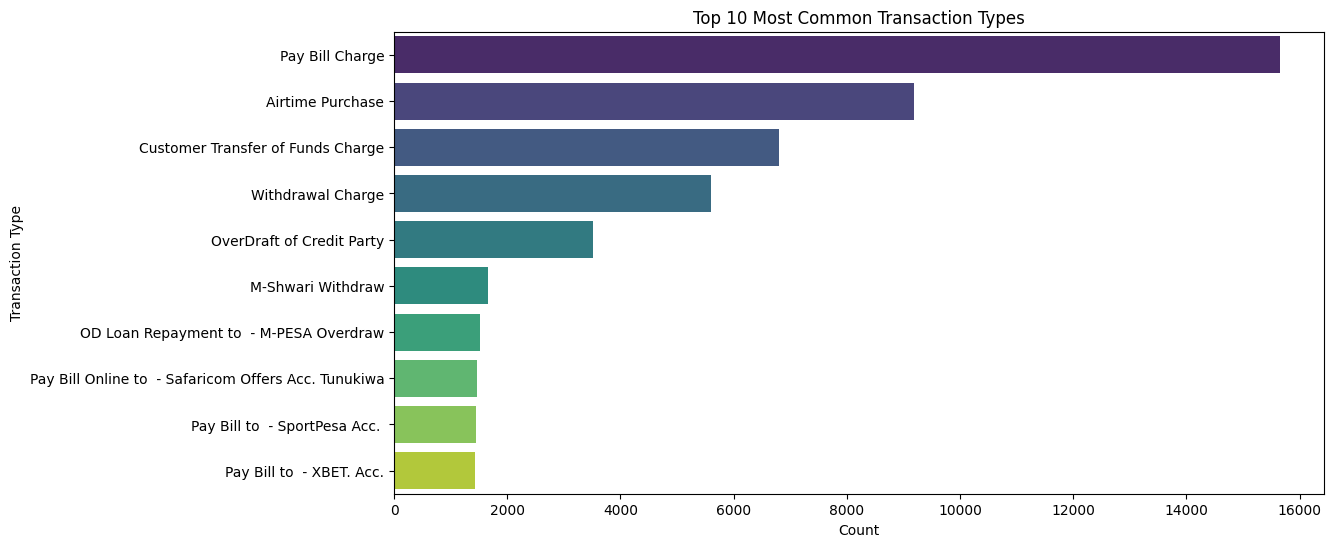

In [ ]:
# Analyze the frequency of transaction types
transaction_type_counts = mpesa_data['transaction_type'].value_counts()

# Total count of the top 10 transaction types
total_top_10 = transaction_type_counts.head(10).sum()

# Calculate the percentage for each transaction type
top_10_percentages = (transaction_type_counts.head(10) / total_top_10) * 100

# Display the percentages
print("Percentage of Top 10 Most Common Transaction Types:")
for txn_type, pct in top_10_percentages.items():
    print(f"{txn_type}: {pct:.2f}%")

# Visualize the frequency of transaction types
plt.figure(figsize=(12, 6))
sns.barplot(x=transaction_type_counts.values[:10], y=transaction_type_counts.index[:10], palette='viridis')
plt.title('Top 10 Most Common Transaction Types')
plt.xlabel('Count')
plt.ylabel('Transaction Type')
plt.show()

# Insights:
# 1. Identify the most frequent transaction types (e.g., airtime purchases, transfers, withdrawals).
# 2. Understand customer behavior, such as common spending or income patterns.
# 3. Highlight any unusual or rare transaction types that might need further investigation.

- There are various transactions where the majority is pay bill charge contributing to 32.41% followed by airtime purchases (19.04%)

## Seasonal transaction trends

In [9]:
# Preprocess the datetime column
mpesa_data['transaction_datetime'] = pd.to_datetime(mpesa_data['transaction_datetime'], errors='coerce')
mpesa_data = mpesa_data.dropna(subset=['transaction_datetime'])

# Extract seasonal features
mpesa_data['month'] = mpesa_data['transaction_datetime'].dt.month
mpesa_data['weekday'] = mpesa_data['transaction_datetime'].dt.day_name()

# Monthly trends 
monthly_trends = mpesa_data.groupby('month')[['received_amount', 'sent_amount']].sum().reset_index()
print("Monthly Transaction Trends:")
print(monthly_trends)

# Weekly trends
weekday_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
weekday_trends = (
    mpesa_data.groupby('weekday')[['received_amount', 'sent_amount']]
    .sum()
    .reindex(weekday_order)
    .reset_index()
)
print("\nWeekday Transaction Trends:")
print(weekday_trends)

# Spending Consistency per customer
consistency = (
    mpesa_data.groupby('customer_id')['sent_amount']
    .agg(['mean', 'std'])
    .rename(columns={'mean': 'sent_mean', 'std': 'sent_std'})
)
consistency['sent_cv'] = consistency['sent_std'] / (consistency['sent_mean'] + 1e-6)
print("\nSpending Consistency (CV of sent_amount):")
print(consistency.head())

# Inflow-Outflow Ratio per customer
io = (
    mpesa_data.groupby('customer_id')
    .agg(total_inflows=('received_amount', 'sum'),
         total_outflows=('sent_amount', 'sum'))
)
io['inflow_outflow_ratio'] = io['total_inflows'] / (io['total_outflows'] + 1e-6)
print("\nInflow-Outflow Ratio per Customer:")
print(io.head())


Monthly Transaction Trends:
    month  received_amount  sent_amount
0       1       4425971.23   4405592.74
1       2       3582748.46   3499222.69
2       3       3615173.54   3671825.74
3       4       3184684.84   3238716.99
4       5       2982455.40   2935227.97
5       6       1825433.42   1836244.59
6       7       2950790.06   2962172.63
7       8       2223182.43   2172182.20
8       9       2196325.14   2280716.10
9      10       2756944.00   2741951.04
10     11       3360095.72   3383341.97
11     12       3464690.94   3432050.65

Weekday Transaction Trends:
     weekday  received_amount  sent_amount
0     Monday       5055322.63   5190934.55
1    Tuesday       5981201.45   5854820.35
2  Wednesday       5516863.24   5580989.90
3   Thursday       5716660.89   5288780.37
4     Friday       5856534.27   5667655.52
5   Saturday       5213639.44   5390602.47
6     Sunday       3228273.26   3585462.15

Spending Consistency (CV of sent_amount):
              sent_mean     sent_std

### Visualizations

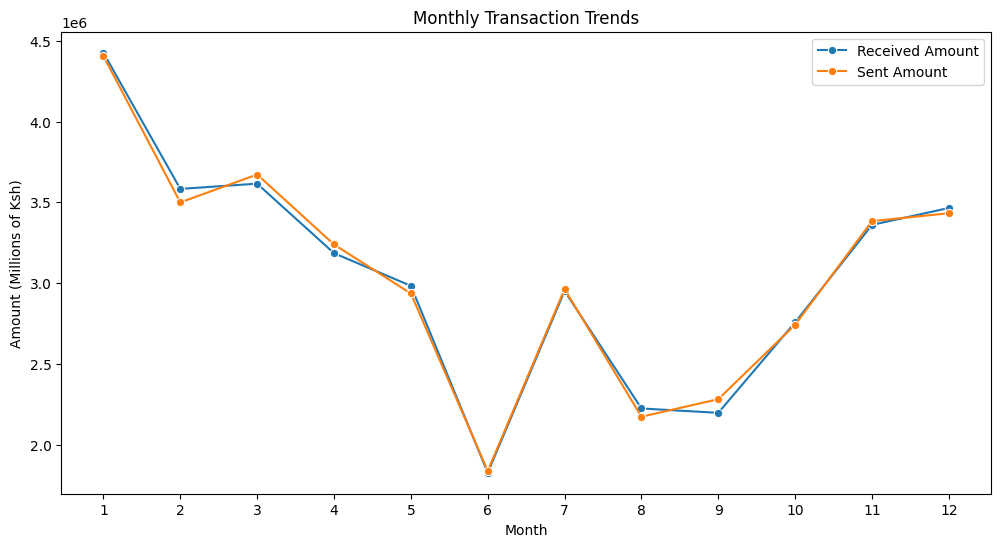

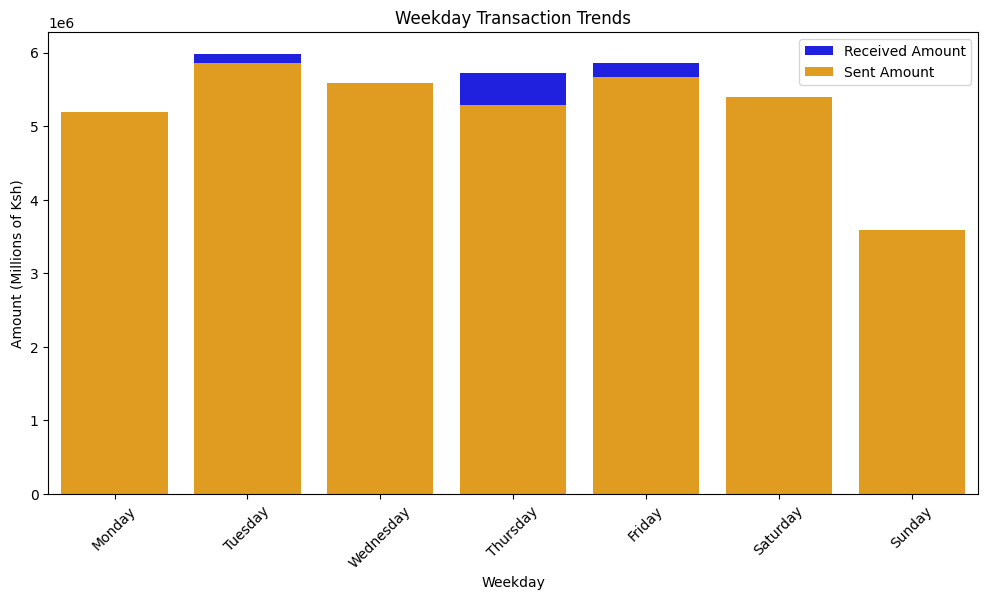

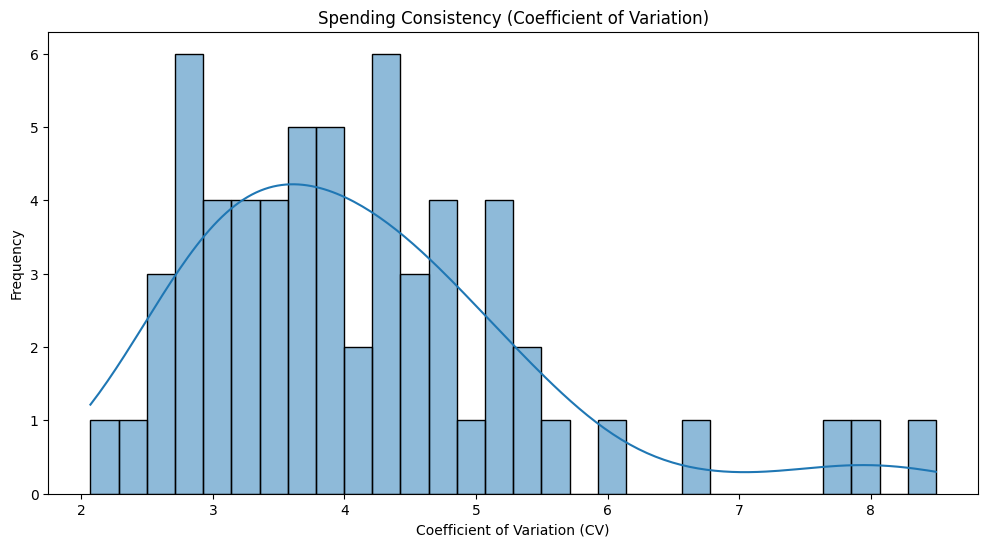

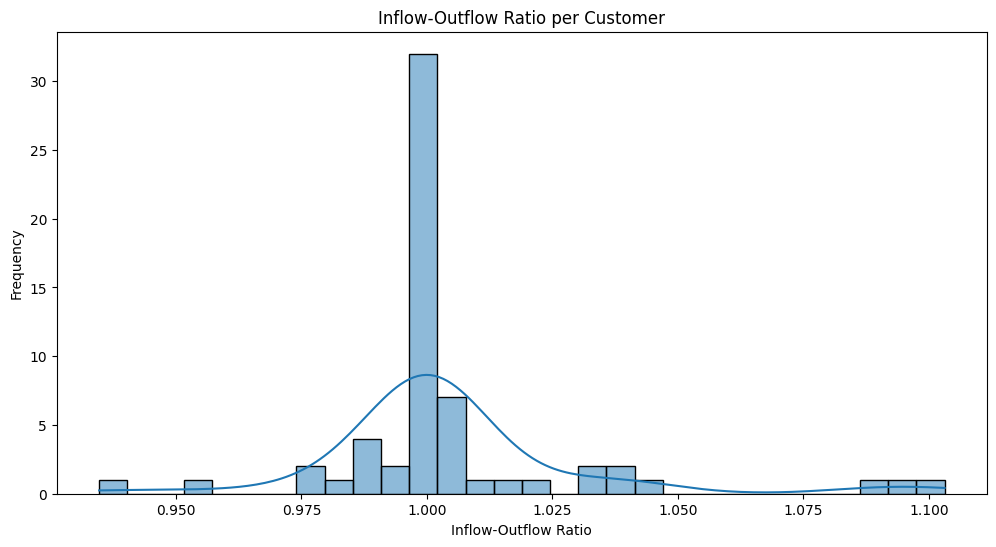

In [11]:
# Visualize monthly trends
plt.figure(figsize=(12, 6)) 
sns.lineplot(data=monthly_trends, x='month', y='received_amount', label='Received Amount', marker='o')
sns.lineplot(data=monthly_trends, x='month', y='sent_amount', label='Sent Amount', marker='o')
plt.title('Monthly Transaction Trends')
plt.xlabel('Month')
plt.ylabel('Amount (Millions of Ksh)')
plt.xticks(monthly_trends['month'])
plt.legend()
plt.show()

# Visualize weekday trends
plt.figure(figsize=(12, 6)) 
sns.barplot(data=weekday_trends, x='weekday', y='received_amount', color='blue', label='Received Amount')
sns.barplot(data=weekday_trends, x='weekday', y='sent_amount', color='orange', label='Sent Amount')
plt.title('Weekday Transaction Trends')
plt.xlabel('Weekday')
plt.ylabel('Amount (Millions of Ksh)')
plt.xticks(rotation=45)
plt.legend()
plt.show()
# Visualize spending consistency
plt.figure(figsize=(12, 6)) 
sns.histplot(consistency['sent_cv'], bins=30, kde=True)
plt.title('Spending Consistency (Coefficient of Variation)')
plt.xlabel('Coefficient of Variation (CV)')
plt.ylabel('Frequency')
plt.show()
# Visualize inflow-outflow ratio
plt.figure(figsize=(12, 6))
sns.histplot(io['inflow_outflow_ratio'], bins=30, kde=True)
plt.title('Inflow-Outflow Ratio per Customer')
plt.xlabel('Inflow-Outflow Ratio')
plt.ylabel('Frequency')
plt.show()

## Seasonal Behavior:

- January  has the highest transaction volume, both for received and sent amounts, exceeding 4.5 million Ksh. This spike likely reflects school fee payments or business restocking.

- There is a steady decline from January to June, with a notable drop in June. June might indicate a cash constraint period or low economic activity.

- July shows a recovery, potentially due to mid-year business cycles or salary payments

- August to December show a gradual increase, peaking again in November and December which may be driven by holiday prep.

## Insights:

- The received and sent lines are closely aligned, meaning customers are spending almost as much as they receive, indicating a tight cash flow cycle.

- Identify cash flow bottlenecks around mid-year

- Align repayment schedules with days of higher inflows.



## Spending Consistency
- Parallel movement of received and sent amounts suggests consistent financial behavior—as customers receive money, they tend to spend it in nearly equal measure.

- The narrow gap between the two lines month-over-month shows that spending habits are closely tied to income, which is typical in lower- to middle-income segments where liquidity is tight.

## Ratio of Inflows to Outflows
- Generally, inflows ≈ outflows, meaning most of the received money is used up within the same month this could imply that there is low savings rates or dependency on cash flow for survival or business operations